In [1]:
import numpy as np

In [2]:
ndata = 100
mA = [1.0, 0.3]
sigmaA = 0.2
mB = [0.0, -0.1]
sigmaB = 0.3

# Generate data for classA
ndata_half = round(0.5 * ndata)
classA = np.zeros((2, ndata))
classA[0, :ndata_half] = np.random.randn(1, ndata_half) * sigmaA - mA[0]
classA[0, ndata_half:] = np.random.randn(1, ndata_half) * sigmaA + mA[0]
classA[1, :] = np.random.randn(1, ndata) * sigmaA + mA[1]

# Generate data for classB
classB = np.zeros((2, ndata))
classB[0, :] = np.random.randn(1, ndata) * sigmaB + mB[0]
classB[1, :] = np.random.randn(1, ndata) * sigmaB + mB[1]

In [3]:
classA[:,:5], classB[:,:5]

(array([[-0.7830192 , -1.12015334, -0.99381317, -1.36644666, -0.9709905 ],
        [ 0.36339076,  0.09410066,  0.24382364,  0.02251069,  0.31341783]]),
 array([[-0.05120333, -0.03184788, -1.0076537 , -0.00552758, -0.13940348],
        [ 0.57756881, -0.5605089 , -0.33362394, -0.25048523, -0.1684783 ]]))

In [4]:
classA.shape, classB.shape

((2, 100), (2, 100))

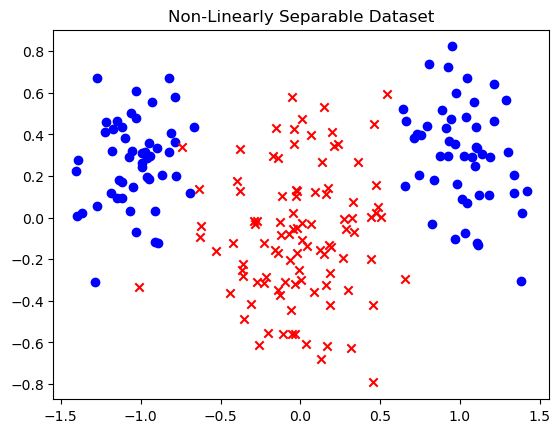

In [5]:
import matplotlib.pyplot as plt
plt.title("Non-Linearly Separable Dataset")
plt.scatter(classA[0,:], classA[1,:], c='b', label='a', marker='o')
plt.scatter(classB[0,:], classB[1,:], c='r', label='b', marker='x')
plt.show()

In [6]:
classA = np.vstack((classA, (-1) * np.ones(ndata)))
classB = np.vstack((classB, np.ones(ndata)))
classA.shape, classB.shape

((3, 100), (3, 100))

In [7]:
rng = np.random.default_rng()

rng.shuffle(classA, axis=1)
rng.shuffle(classB, axis=1)

In [8]:
dataset = np.vstack((np.ones(2*ndata), np.hstack((classA, classB))))
dataset.shape, dataset[:,:5]

((4, 200),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-0.66717038, -0.95830938,  1.2101658 ,  1.03362855,  0.94845504],
        [ 0.43688493,  0.28629194,  0.6397904 , -0.07429674,  0.82215652],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]))

In [9]:
# shuffling the dataset horizontally...
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.65415274, -0.86462848, -1.40504595,  1.12127617,  0.44378237],
       [-0.29699946,  0.20660882,  0.22348775,  0.11088359, -0.1966881 ],
       [ 1.        , -1.        , -1.        , -1.        ,  1.        ]])

In [10]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 200), (200,))

In [11]:
class PerceptronDeltaRuleClassifier:
    def __init__(self, learning_rate):
        self.W = np.random.rand(3)
        self.learning_rate = learning_rate
        self.epochs = 0

    def predict(self, X):
        return np.array((self.W @ X) > 0, dtype=int) * 2 - 1

    def fit(self, X, y, n_epochs, batch_size = 0):
        if (batch_size == 0):
            for _ in range(0, n_epochs):
                predictions = self.W @ X # without step function
                e = y - predictions 
                dW = self.learning_rate * (e @ X.T)
                self.W += dW

                predErrors = y - ( np.array((self.W @ X) > 0, dtype=int) * 2 - 1 )
                nErrors = np.sum( np.array(predErrors != 0, dtype=int))
                print("After {} epochs: {} errors".format(self.epochs, nErrors))
                self.epochs += 1
                if (nErrors == 0):
                    return True
        else:
            for _ in range(0, n_epochs):
                idx = 0
                while (idx < X.shape[1]):
                    next_idx = idx + batch_size
                    print(X[:, idx:next_idx].shape)
                    predictions = self.W @ X[:, idx:next_idx] # without step function
                    print(predictions.shape)
                    e = y[idx:next_idx] - predictions
                    print(e.shape)
                    dW = self.learning_rate * (e @ X[:, idx:next_idx])
                    self.W += dW

                    self.epochs += 1
                    idx = next_idx
                    print("done")
        
    def fit_one_epoch(self, X, y):
        for i in range(0, X.shape[1]): # for each sample
        # for i in range(0, 3):
            prediction = self.W @ X[:,i]    # compute the prediction 
            #print(prediction)
            e = y[i] - prediction         # calculate the error
            print(e)
            dW = self.learning_rate * (e * X[:,i])  
            #print(dW)
            self.W = self.W + dW
            #print(self.W)
            if (i%10 == 0):
                print("Weights after {} points: {}".format(i, self.W))

        # after the epoch see how many are wrongly classified
        pred_labels = self.predict(X)
        pred_errors = y - pred_labels
        nErrors = np.sum(np.array(pred_errors != 0, dtype=int))
        print("Errors after this epoch:" + str(nErrors))

In [12]:
perceptron_classifier = PerceptronDeltaRuleClassifier(0.01)

In [13]:
classA.shape

(3, 100)

In [14]:
classA[0,:5]

array([-0.66717038, -0.95830938,  1.2101658 ,  1.03362855,  0.94845504])

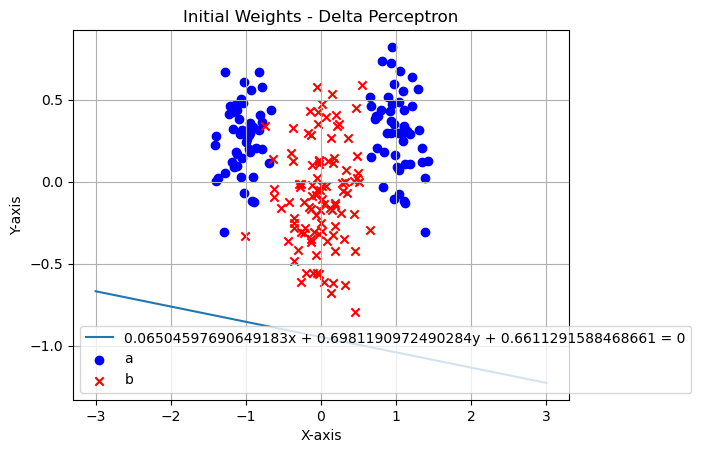

[0.66112916 0.06504598 0.6981191 ]


In [15]:
x = np.linspace(-3, 3, 10)
a = perceptron_classifier.W[1]
b = perceptron_classifier.W[2]
c = perceptron_classifier.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(classA[0,:], classA[1,:], c='b', label='a', marker='o')
plt.scatter(classB[0,:], classB[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(perceptron_classifier.W)

In [16]:
for _ in range(200):
    perceptron_classifier.fit_one_epoch(X_train, y_train)
perceptron_classifier.W

0.5036618337996553
Weights after 0 points: [0.66616578 0.06834069 0.69662322]
-1.7510049668423404
-1.686240192835598
-1.828388734829644
0.48319320168296276
-1.7108689375955524
-1.2547476697848157
0.3145877246118831
0.3183162655214158
0.7075168925432735
0.311902332604186
Weights after 10 points: [0.60520844 0.12027446 0.6840619 ]
-1.7786110537057045
-1.6528303747180701
-1.6881557404615746
0.8392756374092926
0.43118028307116885
-1.6212265760425426
-1.874417524813401
-1.6337013815842452
-1.6410649234828951
-1.9597528316565223
Weights after 20 points: [0.47941539 0.14662153 0.63676643]
-1.4919385891100831
0.2854191576645797
0.1709306117426138
0.6450735063188142
0.9056801038669599
0.29827059550862633
-1.702767965768836
0.5229758625487475
0.5382219060393528
0.7085223529265355
Weights after 30 points: [0.48821927 0.13687144 0.62756222]
0.9189419901959259
0.45836272946338097
-1.816382212149247
0.6746943932464466
-1.8829553491038467
0.5921029581381545
0.6276129308335645
0.3407940710491234
0.548

array([ 0.19399016,  0.04963885, -1.68955015])

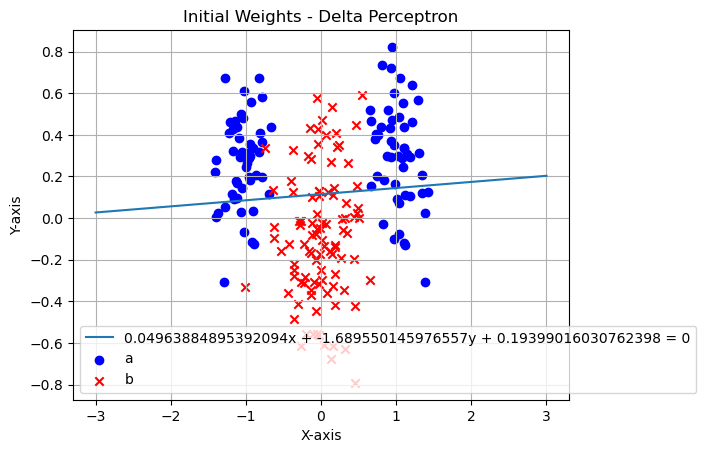

[ 0.19399016  0.04963885 -1.68955015]


In [17]:
x = np.linspace(-3, 3, 10)
a = perceptron_classifier.W[1]
b = perceptron_classifier.W[2]
c = perceptron_classifier.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(classA[0,:], classA[1,:], c='b', label='a', marker='o')
plt.scatter(classB[0,:], classB[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(perceptron_classifier.W)

-----------------

### 1) Taking out random 25% from each class

In [18]:
t = int(ndata - (ndata * 0.25))
classA_new = classA[:,:t]
classA_holdout = classA[:,t:]
classA_new.shape, classA_holdout.shape

((3, 75), (3, 25))

In [19]:
classB_new = classB[:,:t]
classB_holdout = classB[:,t:]
classB_new.shape, classB_holdout.shape

((3, 75), (3, 25))

In [20]:
dataset = np.hstack((classA_new, classB_new))
dataset[:,:3], dataset.shape

(array([[-0.66717038, -0.95830938,  1.2101658 ],
        [ 0.43688493,  0.28629194,  0.6397904 ],
        [-1.        , -1.        , -1.        ]]),
 (3, 150))

In [21]:
dataset = np.vstack((np.ones(2*t), dataset))
dataset.shape, dataset[:,:5]

((4, 150),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-0.66717038, -0.95830938,  1.2101658 ,  1.03362855,  0.94845504],
        [ 0.43688493,  0.28629194,  0.6397904 , -0.07429674,  0.82215652],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]))

In [22]:
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.62822332, -1.13784199,  0.97959817, -0.7830192 , -0.27179499],
       [-0.09542988,  0.17892756,  0.16241779,  0.36339076, -0.01488265],
       [ 1.        , -1.        , -1.        , -1.        ,  1.        ]])

In [23]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 150), (150,))

In [24]:
X_train[:,:5], y_train[:5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-0.62822332, -1.13784199,  0.97959817, -0.7830192 , -0.27179499],
        [-0.09542988,  0.17892756,  0.16241779,  0.36339076, -0.01488265]]),
 array([ 1., -1., -1., -1.,  1.]))

In [25]:
perceptron_classifier = PerceptronDeltaRuleClassifier(0.01)

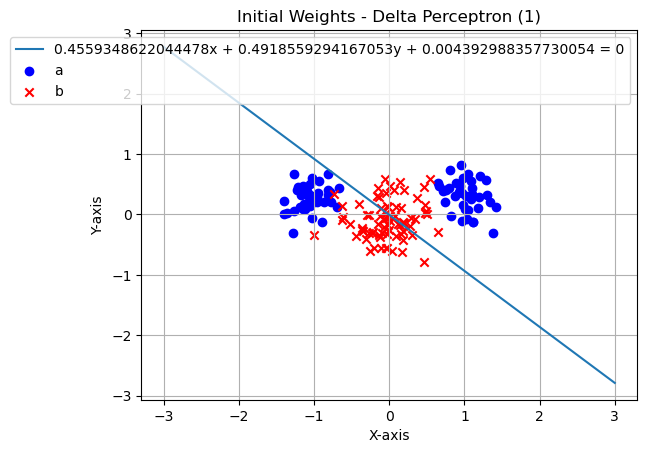

[0.00439299 0.45593486 0.49185593]


In [26]:
a = perceptron_classifier.W[1]
b = perceptron_classifier.W[2]
c = perceptron_classifier.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron (1)")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(classA_new[0,:], classA_new[1,:], c='b', label='a', marker='o')
plt.scatter(classB_new[0,:], classB_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(perceptron_classifier.W)

In [27]:
for _ in range(200):
    perceptron_classifier.fit_one_epoch(X_train, y_train)
perceptron_classifier.W

1.3289736754788195
Weights after 0 points: [0.01768273 0.44758594 0.49058769]
-0.5961803050349956
-1.5363273979630727
-0.8293425315628256
1.1403090665113136
1.03335355374642
1.0087318631318782
-1.5508177118497408
0.5824174009048737
0.7060523369639689
1.2075571575380528
Weights after 10 points: [0.02934026 0.43767482 0.4740301 ]
0.8197789679178401
-0.8777993172786911
-0.5386559038911177
-0.6978295567922257
-1.7604302601520176
-0.9104691647644044
1.2823795597701442
0.8428874245450826
-0.7441468492288406
-1.5253665120224482
Weights after 20 points: [-0.01175626  0.4455263   0.43948687]
1.6073158223491941
1.147063759764582
-0.6492726325143844
-1.4220876429862008
1.3130294967603684
-0.7711430380058879
1.2531948676405251
1.3243830668456325
1.0836730211028702
-1.5067380340665317
Weights after 30 points: [0.02203793 0.40721857 0.40115725]
-1.4246623757673702
1.0684599477002135
0.7105581586378694
-1.5820452352117589
1.0072008726752175
-1.3208734701947198
1.1869857992937938
-0.779150438777066
-0

array([ 0.14469429,  0.02905014, -1.67771054])

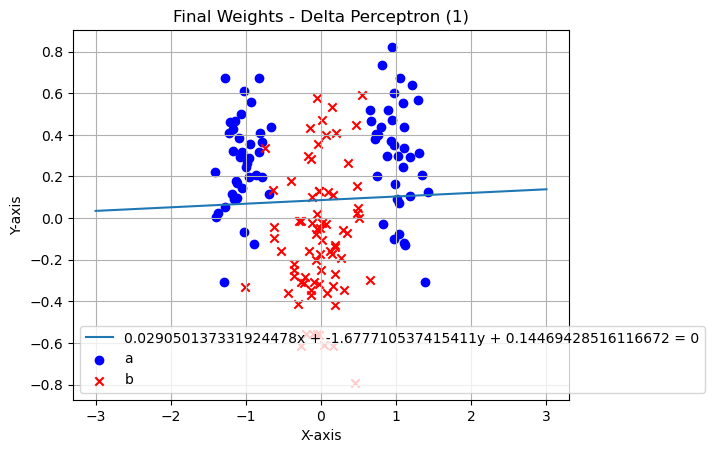

[ 0.14469429  0.02905014 -1.67771054]


In [28]:
a = perceptron_classifier.W[1]
b = perceptron_classifier.W[2]
c = perceptron_classifier.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Final Weights - Delta Perceptron (1)")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(classA_new[0,:], classA_new[1,:], c='b', label='a', marker='o')
plt.scatter(classB_new[0,:], classB_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(perceptron_classifier.W)

In [29]:
holdout = np.hstack((classA_holdout, classB_holdout))
holdout[:,:5]

array([[-1.39306524,  1.03771834,  0.92472834, -0.91209073, -1.03197109],
       [ 0.27690303,  0.48492497,  0.72183972, -0.11724436,  0.47921868],
       [-1.        , -1.        , -1.        , -1.        , -1.        ]])

In [30]:
X_holdout = np.vstack((np.ones(50), holdout[:2, :]))
y_holdout = holdout[2,:]
X_holdout[:,:5], y_holdout[:5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-1.39306524,  1.03771834,  0.92472834, -0.91209073, -1.03197109],
        [ 0.27690303,  0.48492497,  0.72183972, -0.11724436,  0.47921868]]),
 array([-1., -1., -1., -1., -1.]))

In [31]:
predictions = perceptron_classifier.predict(X_holdout)
diff = predictions - y_holdout
predictions, diff

(array([-1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1]),
 array([ 0.,  0.,  0.,  2.,  0.,  2.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., -2., -2.,  0.,  0.,  0., -2., -2.,  0., -2.,  0.,
        -2.,  0.,  0., -2.,  0., -2.,  0.,  0.,  0.,  0.,  0.]))

In [32]:
accuracy_1 = np.sum(np.array(diff == 0, dtype=int)) / len(diff)
accuracy_1

0.76

In [33]:
accuracy_classA_1 = 1 - np.sum(np.array(diff == 2, dtype=int)) / len(diff) # label is -1 and prediction is 1, so diff=2
accuracy_classB_1 = 1 - np.sum(np.array(diff == -2, dtype=int)) / len(diff) # label is 1 and prediction is -1, so diff=-2
accuracy_classA_1, accuracy_classB_1

(0.92, 0.84)

---------

### 1) Taking out random 50% from class A

In [34]:
t = int(ndata - (ndata * 0.5))
classA_new = classA[:,:t]
classA_holdout = classA[:,t:]
classA_new.shape, classA_holdout.shape

((3, 50), (3, 50))

In [35]:
classB_new = classB
classB_holdout = np.array([])

In [36]:
dataset = np.hstack((classA_new, classB_new))
dataset[:,:3], dataset.shape

(array([[-0.66717038, -0.95830938,  1.2101658 ],
        [ 0.43688493,  0.28629194,  0.6397904 ],
        [-1.        , -1.        , -1.        ]]),
 (3, 150))

In [37]:
dataset = np.vstack((np.ones(150), dataset))
dataset.shape, dataset[:,:5]

((4, 150),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-0.66717038, -0.95830938,  1.2101658 ,  1.03362855,  0.94845504],
        [ 0.43688493,  0.28629194,  0.6397904 , -0.07429674,  0.82215652],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]))

In [38]:
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.34076452,  1.29094647, -1.12015334, -0.36583893,  0.45533381],
       [ 0.20489134,  0.56519473,  0.09410066, -0.25148541, -0.42196954],
       [-1.        , -1.        , -1.        ,  1.        ,  1.        ]])

In [39]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 150), (150,))

In [40]:
perceptron_classifier = PerceptronDeltaRuleClassifier(0.01)

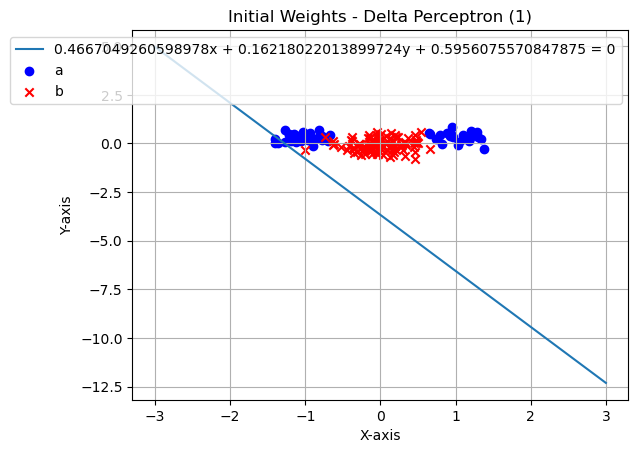

[0.59560756 0.46670493 0.16218022]


In [41]:
a = perceptron_classifier.W[1]
b = perceptron_classifier.W[2]
c = perceptron_classifier.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron (1)")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(classA_new[0,:], classA_new[1,:], c='b', label='a', marker='o')
plt.scatter(classB_new[0,:], classB_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(perceptron_classifier.W)

In [42]:
for _ in range(200):
    perceptron_classifier.fit_one_epoch(X_train, y_train)
perceptron_classifier.W

-2.254578288473148
Weights after 0 points: [0.57306177 0.43647634 0.15756078]
-2.2255818901971205
-1.1077116216228675
0.6501783068350981
0.3235905586172926
0.4881540344850639
-2.0471792785445935
0.5500013217177042
0.7223349040504474
-1.978840750285237
-2.0567205001831868
Weights after 10 points: [0.50624403 0.34838765 0.10904031]
0.5241634947460128
0.37662793023384544
-1.8406638212131037
0.6100834955489662
-1.840519415428532
-1.2218690715045775
0.6388674175246073
-1.8251431693024351
0.5393947863842884
0.5004783288312522
Weights after 20 points: [0.47085822 0.30707092 0.08742638]
0.5048231448270738
0.6537172364670265
0.45688146236834803
0.42221425056818684
0.5922757829164123
0.28556262188971737
-1.1966347551276848
0.6832114500121087
0.6131554310257097
0.544187219527923
Weights after 30 points: [0.50645216 0.31560926 0.07625335]
0.4916256601306074
0.4689239771649131
0.2995558840115211
0.4549717128093924
-1.9239950346400319
0.5480946055483753
-1.8229693614418105
0.6337453239806541
-1.8090

array([ 0.40818479,  0.23008633, -1.51264869])

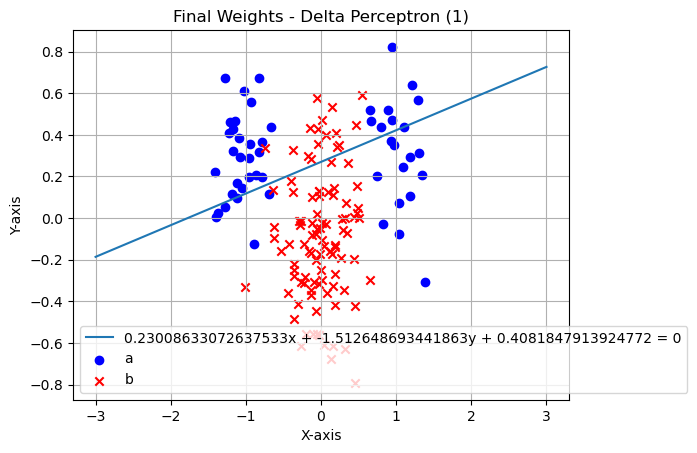

[ 0.40818479  0.23008633 -1.51264869]


In [43]:
a = perceptron_classifier.W[1]
b = perceptron_classifier.W[2]
c = perceptron_classifier.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Final Weights - Delta Perceptron (1)")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(classA_new[0,:], classA_new[1,:], c='b', label='a', marker='o')
plt.scatter(classB_new[0,:], classB_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(perceptron_classifier.W)

In [44]:
holdout = classA_holdout
X_holdout = np.vstack((np.ones(50), holdout[:2, :]))
y_holdout = holdout[2,:]

In [45]:
predictions = perceptron_classifier.predict(X_holdout)
diff = predictions - y_holdout
predictions, diff

(array([-1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,
         1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
         1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1]),
 array([0., 0., 0., 2., 0., 2., 2., 2., 0., 2., 0., 0., 0., 2., 0., 2., 0.,
        2., 0., 0., 2., 0., 2., 2., 2., 0., 0., 0., 2., 0., 2., 0., 0., 0.,
        2., 2., 0., 0., 2., 2., 0., 2., 0., 0., 2., 0., 2., 2., 2., 2.]))

In [46]:
y_holdout

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [47]:
accuracy_2 = np.sum(np.array(diff == 0, dtype=int)) / len(diff)
accuracy_2

0.52

--------------

# 3) taking out 50% of class B

In [48]:
classA_new = classA
classA_holdout = np.array([])

In [49]:
t = int(ndata - (ndata * 0.5))
classB_new = classB[:,:t]
classB_holdout = classB[:,t:]
classB_new.shape, classB_holdout.shape

((3, 50), (3, 50))

In [50]:
dataset = np.hstack((classA_new, classB_new))
dataset[:,:3], dataset.shape

(array([[-0.66717038, -0.95830938,  1.2101658 ],
        [ 0.43688493,  0.28629194,  0.6397904 ],
        [-1.        , -1.        , -1.        ]]),
 (3, 150))

In [51]:
dataset = np.vstack((np.ones(150), dataset))
dataset.shape, dataset[:,:5]

((4, 150),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-0.66717038, -0.95830938,  1.2101658 ,  1.03362855,  0.94845504],
        [ 0.43688493,  0.28629194,  0.6397904 , -0.07429674,  0.82215652],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]))

In [52]:
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.86462848, -0.78562163,  0.72800166, -0.69305684, -0.29047262],
       [ 0.20660882,  0.58052734,  0.4039295 ,  0.11598904, -0.0155787 ],
       [-1.        , -1.        , -1.        , -1.        ,  1.        ]])

In [53]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 150), (150,))

In [54]:
perceptron_classifier = PerceptronDeltaRuleClassifier(0.01)

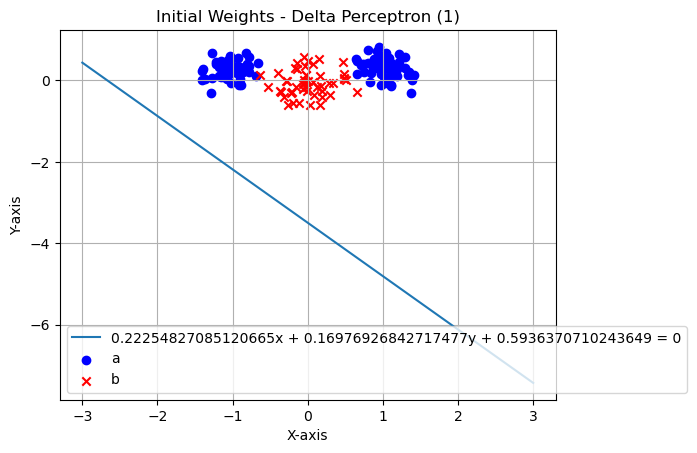

[0.59363707 0.22254827 0.16976927]


In [55]:
a = perceptron_classifier.W[1]
b = perceptron_classifier.W[2]
c = perceptron_classifier.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron (1)")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(classA_new[0,:], classA_new[1,:], c='b', label='a', marker='o')
plt.scatter(classB_new[0,:], classB_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(perceptron_classifier.W)

In [56]:
for _ in range(200):
    perceptron_classifier.fit_one_epoch(X_train, y_train)
perceptron_classifier.W

-1.4362913257948802
Weights after 0 points: [0.57927416 0.23496685 0.16680176]
-1.491512098888027
-1.8078244360711422
-1.4019316089336606
0.5407175659114876
-1.8587875311778645
0.37228174424892724
0.4730746106995032
-1.284112107760268
0.5220839002848946
-1.3381040298171167
Weights after 10 points: [0.50653302 0.25180173 0.13355374]
0.592194269400914
-1.2685245816015192
-1.835284485038827
-1.284664724351662
-1.2901072487360166
-1.7280676030409017
0.6928393162493935
-1.6904448726009713
-1.760615135617547
-1.668140593457442
Weights after 20 points: [0.39412486 0.19563926 0.08991501]
0.673643139888784
-1.6450449932452924
-1.5481808522324172
0.6945773000662212
0.6746107870076725
0.6205540788388075
0.5716797457676006
-1.2880742617889624
0.7194713915416195
-1.2620506592984233
Weights after 30 points: [0.37623672 0.17585707 0.07526466]
0.5579704354426573
0.6598642545010662
-1.5398507421512004
-1.1397334642709234
-1.5969864779504095
-1.2282439263807996
-1.2134315048990065
-1.48548426536502
-1.4

array([-0.08086267,  0.05371382, -1.67492706])

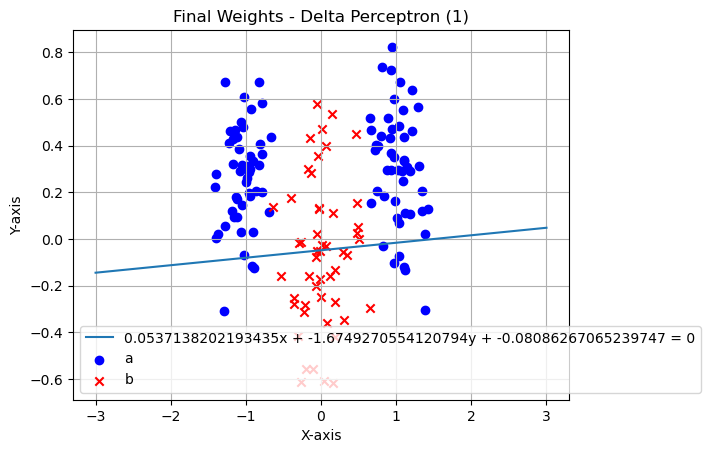

[-0.08086267  0.05371382 -1.67492706]


In [57]:
a = perceptron_classifier.W[1]
b = perceptron_classifier.W[2]
c = perceptron_classifier.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Final Weights - Delta Perceptron (1)")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(classA_new[0,:], classA_new[1,:], c='b', label='a', marker='o')
plt.scatter(classB_new[0,:], classB_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(perceptron_classifier.W)

In [58]:
holdout = classB_holdout
X_holdout = np.vstack((np.ones(50), holdout[:2, :]))
y_holdout = holdout[2,:]

In [59]:
predictions = perceptron_classifier.predict(X_holdout)
diff = predictions - y_holdout
predictions, diff

(array([-1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
         1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,
        -1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1]),
 array([-2.,  0.,  0.,  0.,  0., -2.,  0.,  0., -2.,  0.,  0.,  0.,  0.,
        -2.,  0.,  0.,  0.,  0., -2., -2.,  0., -2.,  0., -2.,  0.,  0.,
         0., -2.,  0., -2., -2., -2.,  0.,  0., -2., -2.,  0., -2.,  0.,
        -2.,  0.,  0., -2., -2., -2.,  0., -2.,  0.,  0., -2.]))

In [60]:
accuracy_3 = np.sum(np.array(diff == 0, dtype=int)) / len(diff)
accuracy_3

0.58

---------------

# 4) taking out 20% from a subset of classA for which classA(1,:)<0 and 80% from a subset of classA for which classA(1,:)>0

In [61]:
classA[:,:3]

array([[-0.66717038, -0.95830938,  1.2101658 ],
       [ 0.43688493,  0.28629194,  0.6397904 ],
       [-1.        , -1.        , -1.        ]])

In [62]:
a_less_zero = classA[:, classA[0, :] < 0]
a_more_zero = classA[:, classA[0, :] >= 0]
a_less_zero.shape, a_more_zero.shape

((3, 50), (3, 50))

In [63]:
classB_new = classB

In [64]:
classA_new = np.hstack((a_less_zero[:, 10:], a_more_zero[:, 40:]))
classA_holdout = np.hstack((a_less_zero[:, 10:], a_more_zero[:, 40:]))
classA_new.shape, classA_holdout.shape

((3, 50), (3, 50))

In [65]:
dataset = np.hstack((classA_new, classB_new))
dataset[:,:3], dataset.shape

(array([[-0.96309797, -0.82106703, -1.14890407],
        [ 0.1967742 ,  0.31564793,  0.46632302],
        [-1.        , -1.        , -1.        ]]),
 (3, 150))

In [66]:
dataset = np.vstack((np.ones(150), dataset))
dataset.shape, dataset[:,:5]

((4, 150),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-0.96309797, -0.82106703, -1.14890407, -0.89323827, -1.27239378],
        [ 0.1967742 ,  0.31564793,  0.46632302, -0.12325028,  0.67177193],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]))

In [67]:
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.00636095,  1.12127617, -1.28677687, -0.35660902, -0.03184788],
       [-0.29918841,  0.11088359, -0.30857977, -0.28046974, -0.5605089 ],
       [ 1.        , -1.        , -1.        ,  1.        ,  1.        ]])

In [68]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 150), (150,))

In [69]:
perceptron_classifier = PerceptronDeltaRuleClassifier(0.01)

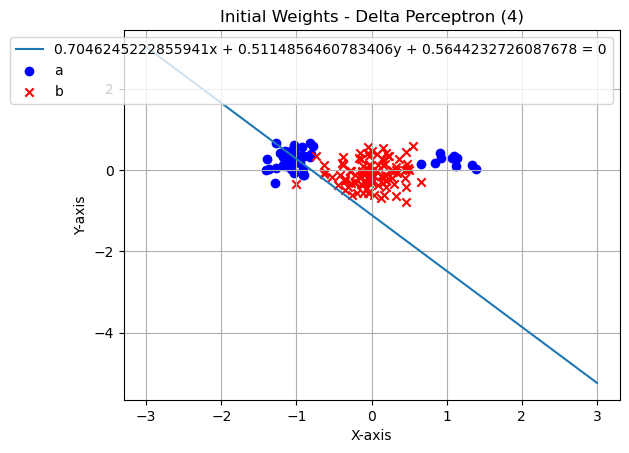

[0.56442327 0.70462452 0.51148565]


In [70]:
a = perceptron_classifier.W[1]
b = perceptron_classifier.W[2]
c = perceptron_classifier.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron (4)")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(classA_new[0,:], classA_new[1,:], c='b', label='a', marker='o')
plt.scatter(classB_new[0,:], classB_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(perceptron_classifier.W)

In [71]:
for _ in range(200):
    perceptron_classifier.fit_one_epoch(X_train, y_train)
perceptron_classifier.W

0.5841252207416523
Weights after 0 points: [0.57026452 0.70466168 0.50973801]
-2.4169064543780183
-0.5177571613656848
0.8457450573223643
0.7560961991531767
0.14671453733951978
0.10419772742798472
0.18576798129078897
-0.7194533737011869
-1.0812236557731778
0.4186164476872838
Weights after 10 points: [0.5474825  0.70390766 0.49568063]
0.5293964331156726
0.41259745849160434
0.41472934519307136
0.4888525662449503
0.6330834124890261
0.7829566397363783
0.0538375578504976
-1.0080381646603367
-2.253880235145004
0.4171985031956005
Weights after 20 points: [0.55218983 0.68884046 0.48967513]
0.7126143317530245
0.10602834350166246
-0.8210368227548042
0.40604492069079046
-0.7895117005795949
0.7229983192014735
0.7345163529798513
0.49623895227799064
0.4700549254041333
0.8366143581503981
Weights after 30 points: [0.58093545 0.70076015 0.47851174]
0.8755333272844102
0.2385330719048302
-1.078333719471071
-0.9913863257456057
-2.374745525371247
1.3077640292198573
-0.6386162470182015
0.6666663475144731
-0.

array([ 0.51984249,  0.5662984 , -1.21964189])

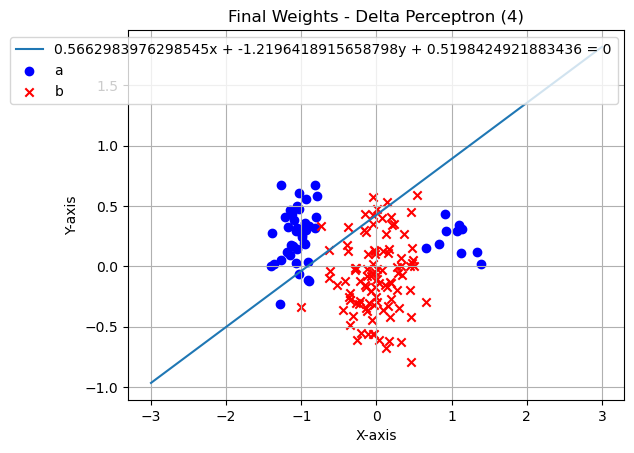

[ 0.51984249  0.5662984  -1.21964189]


In [72]:
a = perceptron_classifier.W[1]
b = perceptron_classifier.W[2]
c = perceptron_classifier.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Final Weights - Delta Perceptron (4)")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(classA_new[0,:], classA_new[1,:], c='b', label='a', marker='o')
plt.scatter(classB_new[0,:], classB_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(perceptron_classifier.W)

In [73]:
holdout = classA_holdout
X_holdout = np.vstack((np.ones(50), holdout[:2, :]))
y_holdout = holdout[2,:]

In [74]:
predictions = perceptron_classifier.predict(X_holdout)
diff = predictions - y_holdout
predictions, diff

(array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]),
 array([0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 2., 0., 0., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]))

In [75]:
accuracy_4 = np.sum(np.array(diff == 0, dtype=int)) / len(diff)
accuracy_4

0.72

In [76]:
print("Accuracy in section 1: {}".format(accuracy_1))
print("Accuracy A in section 1: {}".format(accuracy_classA_1))
print("Accuracy B in section 1: {}".format(accuracy_classB_1))

print("Accuracy in section 2: {}".format(accuracy_2))

print("Accuracy in section 3: {}".format(accuracy_3))

print("Accuracy in section 4: {}".format(accuracy_4))

Accuracy in section 1: 0.76
Accuracy A in section 1: 0.92
Accuracy B in section 1: 0.84
Accuracy in section 2: 0.52
Accuracy in section 3: 0.58
Accuracy in section 4: 0.72
